In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from patsy.builtins import *

In [36]:
gdp_le = pd.read_csv("../data/gdp_le.csv")
gdp_le.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575


1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.  
    a. What coefficients do you get? Interpret the meaning of these coefficents.  
      
   
 
    e. Inspect the R-squared value for the model. does it make sense, given the plot?  

In [39]:
gdp_fit = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

In [41]:
print(f"The coefficients for linear regression are listed below:")
gdp_fit.params

The coefficients for linear regression are listed below:


Intercept   -468.138140
Year           0.267722
dtype: float64

We get -468.138 as our intercept and year is 0.2677. So for every 0.2677 of a year we will decrease life expectancy by 468.318

b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the [patsy identity function](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.I) to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [91]:
gdp_fit_1990 = smf.ols("Life_Expectancy ~ I(Year)>1990", data=gdp_le).fit()
gdp_fit_1990.params

Intercept                 64.745253
I(Year) > 1990[T.True]     4.381894
dtype: float64

In [95]:
gdp_fit_1990.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     31.12
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.54e-08
Time:                        22:04:36   Log-Likelihood:                -20139.
No. Observations:                5504   AIC:                         4.028e+04
Df Residuals:                    5502   BIC:                         4.029e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 64.7453      0.775     83.556      0.000      63.226      66.264
I(Year) > 1990[T.True]     4.3819      0.785      5.579      0.000       2.842       5.922
==============================================================================
Omnibus:                      441.762   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.020
Skew:                          -0.776   Prob(JB):                    3.01e-121
Kurtosis:                       3.119   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

These new coefficients say that for each 4.38 years, the slope(life expectancy) increases by 64.74. Based on the p value being nearly 0 we can conclude that this is indeed statistically significant. 

c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  

In [174]:
pred_df = pd.DataFrame(
    {
        'Year': np.linspace(start=gdp_le['Year'].min(), stop=gdp_le['Year'].max())
    }
)
pred_df['mean_estimate'] = gdp_fit.predict(pred_df)

pred_df.head(2)


,Year,mean_estimate
0,1990.000000,64.628889
1,1990.653061,64.803728


In [178]:
pred_df['mean_estimate'].mean()

68.91244340648481

In [160]:
gdp_mean = gdp_le['Life_Expectancy'].mean()
gdp_mean

69.01011528644356

The actual result is 69.01 compared to the models result of 68.912443. It holds up fairly well I'd say. The numbers aren't vastly different by any means. 

 d. Plot the actual values against your model's estimates for the mean life expectancy. 

KeyError: 'Life_Expectancy'

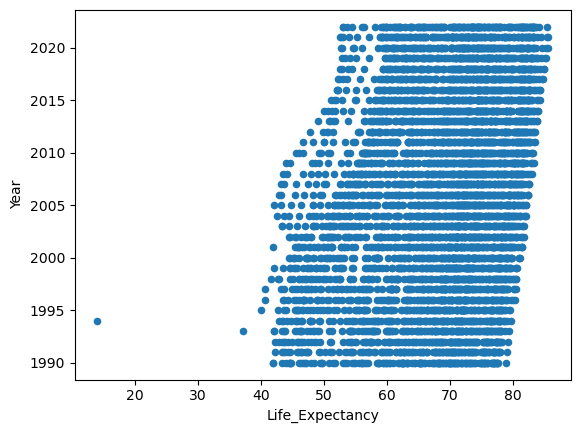

In [180]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="Life_Expectancy", y="Year", ax=ax)
pred_df.plot(kind="line", x="Life_Expectancy", y="mean_estimate", color="black", ax=ax);